In [90]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.utils import to_categorical

import sys
import os
import matplotlib.pyplot as plt

In [91]:
import cv2
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import glob
from PIL import Image

In [92]:
import numpy as np

In [93]:
test_img = plt.imread('./helmet_generation/with_helmet_gen/withinverted_5.png') # imread 함수를 써서 이미지 읽기

In [94]:
test_img

array([[[0.84313726, 0.77254903, 0.69411767],
        [0.8392157 , 0.76862746, 0.6901961 ],
        [0.8392157 , 0.76862746, 0.6901961 ],
        ...,
        [0.7176471 , 0.5803922 , 0.43137255],
        [0.73333335, 0.5921569 , 0.44705883],
        [0.73333335, 0.5921569 , 0.4509804 ]],

       [[0.84313726, 0.77254903, 0.69411767],
        [0.8392157 , 0.76862746, 0.6901961 ],
        [0.8392157 , 0.76862746, 0.6901961 ],
        ...,
        [0.7176471 , 0.5803922 , 0.43137255],
        [0.7294118 , 0.5882353 , 0.44705883],
        [0.73333335, 0.5921569 , 0.4509804 ]],

       [[0.8392157 , 0.77254903, 0.69411767],
        [0.8392157 , 0.76862746, 0.6901961 ],
        [0.8392157 , 0.76862746, 0.6901961 ],
        ...,
        [0.72156864, 0.58431375, 0.43529412],
        [0.7294118 , 0.5882353 , 0.44705883],
        [0.73333335, 0.5921569 , 0.4509804 ]],

       ...,

       [[0.85490197, 0.7921569 , 0.7411765 ],
        [0.8784314 , 0.8117647 , 0.7647059 ],
        [0.8901961 , 0

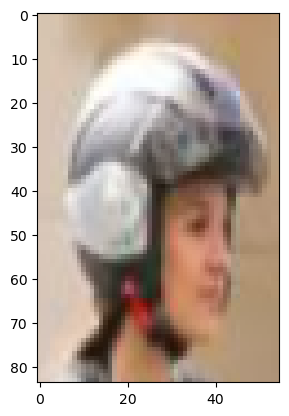

In [95]:
plt.imshow(test_img) # imshow 함수를 써서 이미지 불러오기
plt.show()

In [96]:
test_img2 = plt.imread('./helmet_generation/without_helmet_gen/withoutinverted_1.png')

In [97]:
test_img2

array([[[0.43137255, 0.20392157, 0.14901961],
        [0.3372549 , 0.14901961, 0.1254902 ],
        [0.23529412, 0.10588235, 0.09019608],
        ...,
        [0.45882353, 0.38431373, 0.3529412 ],
        [0.54901963, 0.4745098 , 0.4392157 ],
        [0.39607844, 0.32156864, 0.28627452]],

       [[0.45490196, 0.22745098, 0.16862746],
        [0.3764706 , 0.18039216, 0.14509805],
        [0.28627452, 0.13725491, 0.10980392],
        ...,
        [0.45882353, 0.38431373, 0.3529412 ],
        [0.53333336, 0.45490196, 0.41568628],
        [0.3882353 , 0.3019608 , 0.25490198]],

       [[0.49803922, 0.2784314 , 0.20784314],
        [0.41960785, 0.22745098, 0.1764706 ],
        [0.33333334, 0.1764706 , 0.13333334],
        ...,
        [0.45882353, 0.38431373, 0.35686275],
        [0.5254902 , 0.4392157 , 0.39607844],
        [0.38039216, 0.28627452, 0.23137255]],

       ...,

       [[0.38039216, 0.10196079, 0.07450981],
        [0.43137255, 0.09411765, 0.09019608],
        [0.52156866, 0

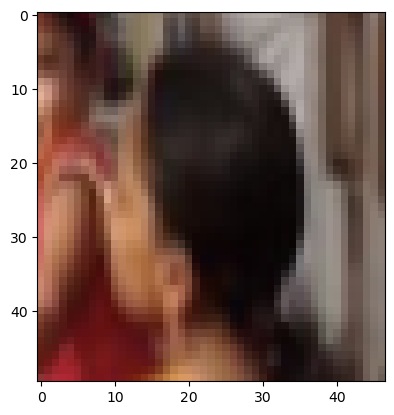

In [98]:
plt.imshow(test_img2) # imshow 함수를 써서 이미지 불러오기
plt.show()

In [99]:
with_helmet_img = glob.glob('./helmet_generation/with_helmet_gen/with*.png')

In [100]:
without_helmet_img = glob.glob('./helmet_generation/without_helmet_gen/with*.png')

In [101]:
len(with_helmet_img)

10000

In [102]:
img_list = []

for i in range(len(with_helmet_img)):
    img = Image.open(with_helmet_img[i])
    img_list.append(img.resize((128,128)))

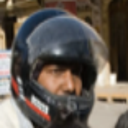

In [103]:
img_list[1]

In [104]:
with_helmet = img_list

In [105]:
without_helmet_img = glob.glob('./helmet_generation/without_helmet_gen/with*.png')

In [106]:
len(without_helmet_img)

10000

In [107]:
img_list1 = []

for i in range(len(without_helmet_img)):
    img = Image.open(without_helmet_img[i])
    img_list1.append(img.resize((128,128)))

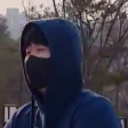

In [108]:
img_list1[1]

In [109]:
without_helmet = img_list1

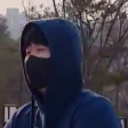

In [110]:
without_helmet[1]

In [111]:
with_helmet

[<PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=12

In [112]:
without_helmet

[<PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=128x128>,
 <PIL.Image.Image image mode=RGB size=12

In [115]:
train_data = with_helmet + without_helmet

In [116]:
new_img_list = []

for i in range(len(train_data)):
    new_img_list.append(np.array(train_data[i]))

train_data = np.array(new_img_list)

In [117]:
train_data

array([[[[245, 241, 239],
         [245, 242, 239],
         [245, 241, 239],
         ...,
         [244, 239, 237],
         [244, 239, 237],
         [244, 239, 237]],

        [[245, 242, 239],
         [245, 242, 239],
         [245, 242, 239],
         ...,
         [244, 240, 237],
         [244, 240, 237],
         [244, 240, 237]],

        [[244, 240, 238],
         [244, 241, 238],
         [244, 240, 238],
         ...,
         [243, 238, 236],
         [243, 238, 236],
         [243, 238, 236]],

        ...,

        [[230, 227, 226],
         [230, 227, 226],
         [229, 226, 225],
         ...,
         [238, 160, 132],
         [237, 163, 101],
         [234, 170, 121]],

        [[228, 225, 226],
         [228, 225, 226],
         [228, 225, 226],
         ...,
         [237, 154,  95],
         [238, 164, 111],
         [234, 171, 125]],

        [[227, 224, 224],
         [227, 224, 224],
         [226, 223, 224],
         ...,
         [232, 168, 118],
        

In [118]:
len(train_data)

20000

In [119]:
train_data.shape

(20000, 128, 128, 3)

In [32]:
with_helmet.shape

(10000, 128, 128, 3)

In [120]:
with_helmet_label = [0] * len(with_helmet)

In [123]:
with_helmet_label

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [121]:
len(with_helmet_label)

10000

In [124]:
without_helmet_label = [1] * len(without_helmet)

In [126]:
without_helmet_label

[1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,


In [125]:
len(without_helmet_label)

10000

In [127]:
label_data = with_helmet_label + without_helmet_label

In [129]:
len(label_data)

20000

In [131]:
label_data = np.array(label_data)

In [132]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(train_data,label_data, random_state=7, test_size=0.3)

In [135]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [136]:
# 컨볼루션 신경망 설정

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3),input_shape=(128,128,3),activation='relu'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 124, 124, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 41, 41, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 41, 41, 64)        0         
                                                                 
 flatten (Flatten)           (None, 107584)            0         
                                                                 
 dense (Dense)               (None, 128)               13770880  
                                                        

In [137]:
# 모델 실행 환경 설정

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 최적화 구역 설정
MODEL_DIR = './model/'
if not os.path.exists(MODEL_DIR):
  os.mkdir(MODEL_DIR)

modelpath = './model/helmet2.hdf5'
checkpointer = ModelCheckpoint(filepath = modelpath, monitor='val_loss', verbose = 1, save_best_only=True)
early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

In [138]:
# 모델 실행

history = model.fit(x_train, y_train, validation_split=0.2, epochs=100, batch_size=100,
          verbose=0, callbacks=[early_stopping_callback, checkpointer])

# 테스트 정확도 출력
print('\n Test Dataset ACC : %.4f'%(model.evaluate(x_test,y_test)[1]))


Epoch 1: val_loss improved from inf to 0.35928, saving model to ./model\helmet2.hdf5

Epoch 2: val_loss improved from 0.35928 to 0.24862, saving model to ./model\helmet2.hdf5

Epoch 3: val_loss improved from 0.24862 to 0.19697, saving model to ./model\helmet2.hdf5

Epoch 4: val_loss improved from 0.19697 to 0.16222, saving model to ./model\helmet2.hdf5

Epoch 5: val_loss improved from 0.16222 to 0.13916, saving model to ./model\helmet2.hdf5

Epoch 6: val_loss improved from 0.13916 to 0.12265, saving model to ./model\helmet2.hdf5

Epoch 7: val_loss improved from 0.12265 to 0.10385, saving model to ./model\helmet2.hdf5

Epoch 8: val_loss did not improve from 0.10385

Epoch 9: val_loss improved from 0.10385 to 0.09307, saving model to ./model\helmet2.hdf5

Epoch 10: val_loss did not improve from 0.09307

Epoch 11: val_loss did not improve from 0.09307

Epoch 12: val_loss did not improve from 0.09307

Epoch 13: val_loss improved from 0.09307 to 0.08714, saving model to ./model\helmet2.hdf

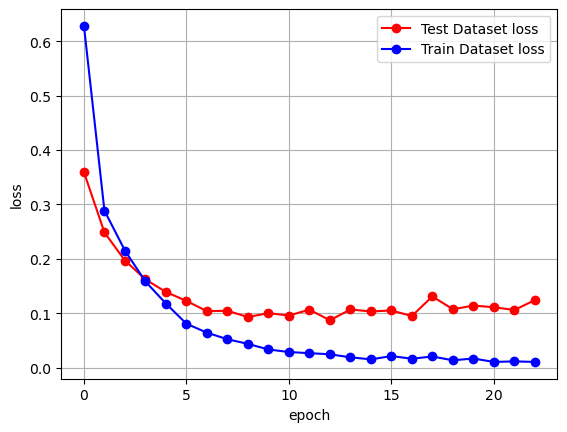

In [139]:
# 학습용 데이터 셋 / 검증 셋 오차 저장

y_vloss = history.history['val_loss']
y_loss = history.history['loss']

# 그래프로 표현
x_len = np.arange(len(y_loss))

plt.plot(x_len, y_vloss, marker='o', c='red', label='Test Dataset loss')
plt.plot(x_len, y_loss, marker='o', c='blue', label='Train Dataset loss')

plt.legend(loc='best')
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [148]:
hw_img = ['hw.png']
hw_img_1 = []
for i in range(len(hw_img)):
    img = Image.open(hw_img[i])
    hw_img_1.append(img.resize((128,128)))

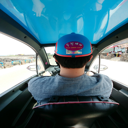

In [149]:
hw_img_1[0]

In [155]:
img = np.array(hw_img_1[0])/255

In [159]:
img = img.reshape(1, 128, 128, -1)
img.shape

(1, 128, 128, 3)

In [160]:
model.predict(img)

1/1 [==============================] - 0s 71ms/step


array([[0.98319757]], dtype=float32)

In [164]:
hs_img = ['hs.png']
hs_img_1 = []
for i in range(len(hs_img)):
    img = Image.open(hs_img[i])
    hs_img_1.append(img.resize((128,128)))
    
img = np.array(hs_img_1[0])/255

img = img.reshape(1, 128, 128, -1)
img.shape

(1, 128, 128, 3)

In [165]:
model.predict(img)

1/1 [==============================] - 0s 13ms/step


array([[0.9999999]], dtype=float32)

In [168]:
model.predict(x_test)[:50]

188/188 [==============================] - 1s 6ms/step


array([[1.00000000e+00],
       [8.17751682e-12],
       [9.99917507e-01],
       [9.99998212e-01],
       [9.99992967e-01],
       [9.99829531e-01],
       [1.00000000e+00],
       [9.99999166e-01],
       [1.00000000e+00],
       [1.34569245e-06],
       [9.54679781e-05],
       [2.89229632e-07],
       [9.99085188e-01],
       [1.11544812e-02],
       [2.13320472e-08],
       [1.00000000e+00],
       [9.99993324e-01],
       [1.00000000e+00],
       [1.00000000e+00],
       [9.99941111e-01],
       [1.77337565e-02],
       [9.99999404e-01],
       [1.12232454e-08],
       [2.16912531e-06],
       [5.81975400e-01],
       [9.30985425e-06],
       [1.52780857e-10],
       [1.00000000e+00],
       [1.00000000e+00],
       [7.30793204e-11],
       [1.00000000e+00],
       [8.87427909e-11],
       [5.20568865e-04],
       [1.00000000e+00],
       [1.02057549e-15],
       [1.79424626e-03],
       [1.00000000e+00],
       [9.99998808e-01],
       [3.40579230e-18],
       [9.99999642e-01],


In [169]:
y_test[:50]

array([1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1])

In [170]:
sh_img = ['sh.png']
sh_img_1 = []
for i in range(len(sh_img)):
    img = Image.open(sh_img[i])
    sh_img_1.append(img.resize((128,128)))
    
img = np.array(sh_img_1[0])/255

img = img.reshape(1, 128, 128, -1)
img.shape

(1, 128, 128, 3)

In [171]:
model.predict(img)

1/1 [==============================] - 0s 14ms/step


array([[1.6319751e-06]], dtype=float32)

In [172]:
yb_img = ['yb.png']
yb_img_1 = []
for i in range(len(yb_img)):
    img = Image.open(yb_img[i])
    yb_img_1.append(img.resize((128,128)))
    
img = np.array(yb_img_1[0])/255

img = img.reshape(1, 128, 128, -1)
img.shape

(1, 128, 128, 3)

In [173]:
model.predict(img)

1/1 [==============================] - 0s 13ms/step


array([[0.2701739]], dtype=float32)

In [188]:
yb_img = ['yb2.png','hs2.png']
yb_img_1 = []
for i in range(len(yb_img)):
    img = Image.open(yb_img[i])
    yb_img_1.append(img.resize((128,128)))
    
data = []
for i in yb_img_1 :
    img = np.array(i)/255
    data.append(img)
    print(img.shape)
data = np.array(data)
data.shape

(128, 128, 3)
(128, 128, 3)


(2, 128, 128, 3)